In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
data = pd.read_csv("Datasets/mul_regression.csv")
data = pd.concat([data,pd.get_dummies(data["State"],drop_first=True)],axis = 1).drop(["State"],axis=1)
data = data[['R&D Spend', 'Administration', 'Marketing Spend', 'Florida', 'New York', 'Profit']]

In [3]:
print("Data Shape :", data.shape)
data.head()

Data Shape : (50, 6)


,R&D Spend,Administration,Marketing Spend,Florida,New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,1,0,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,0,166187.94


In [4]:
# VIF
def VIF(df):
    
    df["Intercept"] = 1
    
    vif = pd.DataFrame()
    vif["features"] = df.columns
    vif["vif"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    
    print(vif)
VIF(data.iloc[:,:-1])

          features        vif
0        R&D Spend   2.495511
1   Administration   1.177766
2  Marketing Spend   2.416797
3          Florida   1.387641
4         New York   1.335061
5        Intercept  26.600153


In [5]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=69)

In [7]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [8]:
# Sklearn Implementation

from sklearn.linear_model import LinearRegression

# Training
model = LinearRegression()
model.fit(x_train, y_train)

# Prediction
y_pred = model.predict(x_test)

# Errors 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
import math

print("MAE : ",mean_absolute_error(y_test,y_pred))
print("MSE : ",mean_squared_error(y_test,y_pred))
print("RMSE : ",math.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score : ",r2_score(y_test,y_pred))
print("Mean Percentage Error : ",mean_absolute_percentage_error(y_test,y_pred)*100)

MAE :  5710.680304584757
MSE :  41800093.882743955
RMSE :  6465.299210612294
R2 Score :  0.9794089137854665
Mean Percentage Error :  5.156014025053556


In [9]:
# From Scratch

print(model.coef_, model.intercept_)

def GradientDescent(x,y,lr=0.01):
    m = np.zeros(x.shape[1])
    c = 0
    
    epochs = 1000
    loss = [0]*epochs
    for epoch in range(epochs):
        # Predict 
        y_pred = np.dot(x,m) + c
        
        # Loss
        error = y_pred - y
        
        # Gradient
        m_grad = np.dot(x.T,error) / len(y)
        c_grad = np.sum(error) / len(y)
        
        # Update parameters
        m -= lr*m_grad
        c -= lr*c_grad
        
        loss[epoch] = np.sum((((x.dot(m) + c) - y) ** 2) / (len(y)))
    
    plt.plot(loss)
    plt.title("Loss Graph")
    plt.show()
    
    return m, c

[35221.10092278 -1525.37939581  3304.74543974   657.85492598
   215.12055796] 110364.04274999998


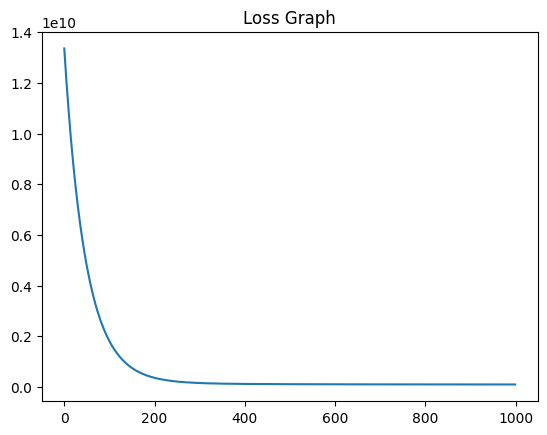

In [10]:
# Training
w, b = GradientDescent(x_train, y_train)

In [11]:
# Predcition 
y_pred = np.dot(x_test,w) + b

# Errors 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
import math

print("MAE : ",mean_absolute_error(y_test,y_pred))
print("MSE : ",mean_squared_error(y_test,y_pred))
print("RMSE : ",math.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score : ",r2_score(y_test,y_pred))
print("Mean Percentage Error : ",mean_absolute_percentage_error(y_test,y_pred)*100)

MAE :  5244.536903236069
MSE :  40981285.90681973
RMSE :  6401.662745476345
R2 Score :  0.9798122656456967
Mean Percentage Error :  4.774751427545628
